In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

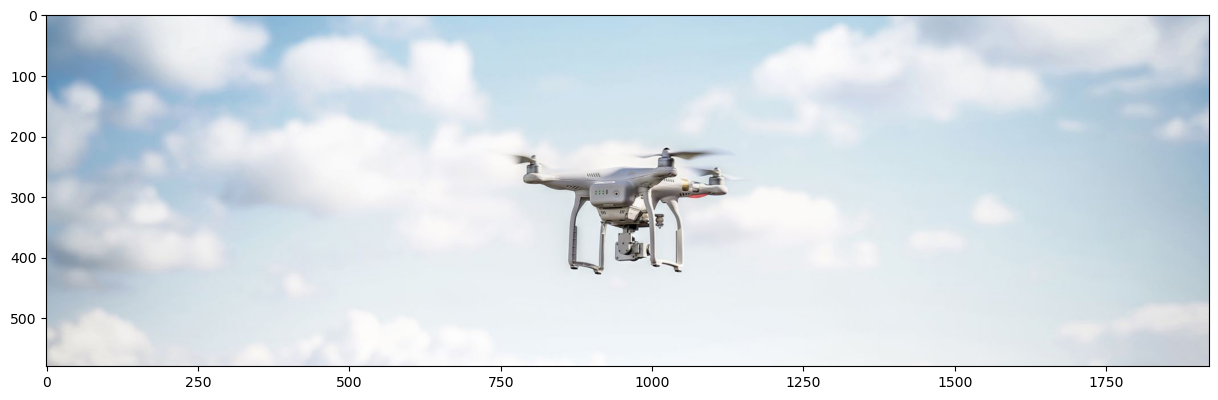

In [43]:
img = cv2.imread('data/Drone_white.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x1a8f8f4d430>)

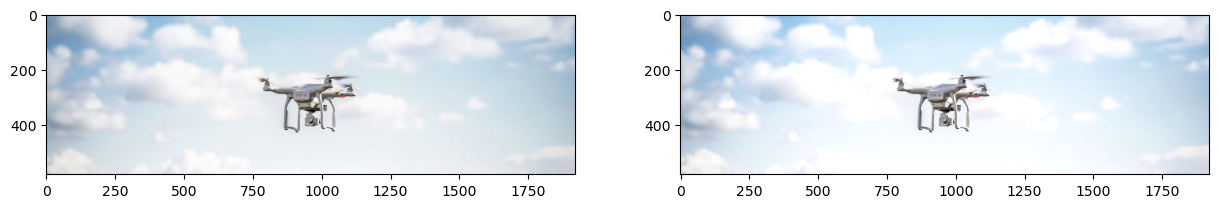

In [45]:
# Define white patch and the coefficients
row, col = 275, 1043
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x1a8e8260f50>)

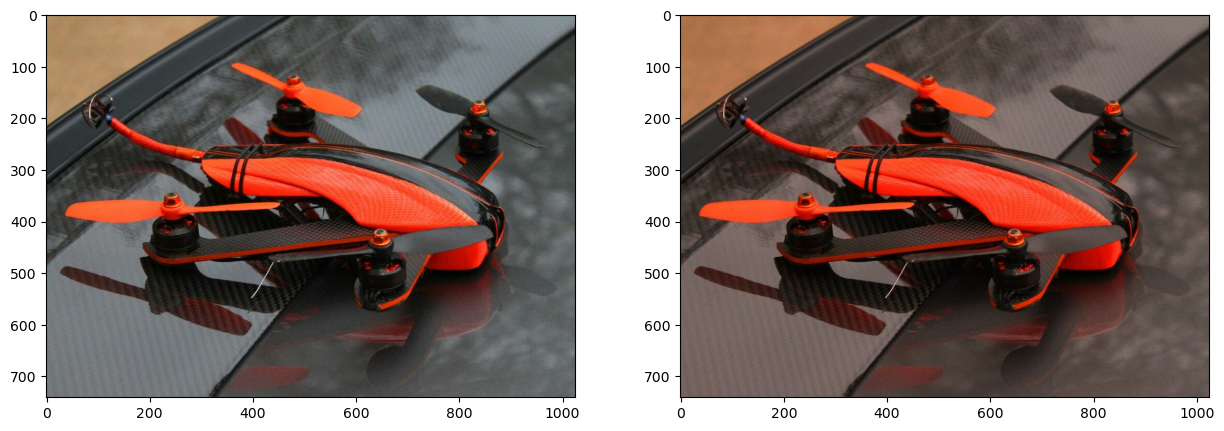

In [65]:
# Load your image
img = cv2.imread('data/col_dr.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
max_mean = max(mean_r, mean_g, mean_b)
if max_mean == mean_r:
    kr = 1
    kg = mean_g / mean_r
    kb = mean_b / mean_r
elif max_mean == mean_g:
    kg = 1
    kb = mean_b / mean_g
    kr = mean_r / mean_g
else:
    kb = 1
    kr = mean_r / mean_b
    kg = mean_g / mean_b

coef = [kr, kg, kb]
# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for ch in range(3):
    balanced[..., ch] = img[..., ch] * coef[ch]
balanced = balanced/255
balanced[balanced > 1] = 1
# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x1a8ef008f50>)

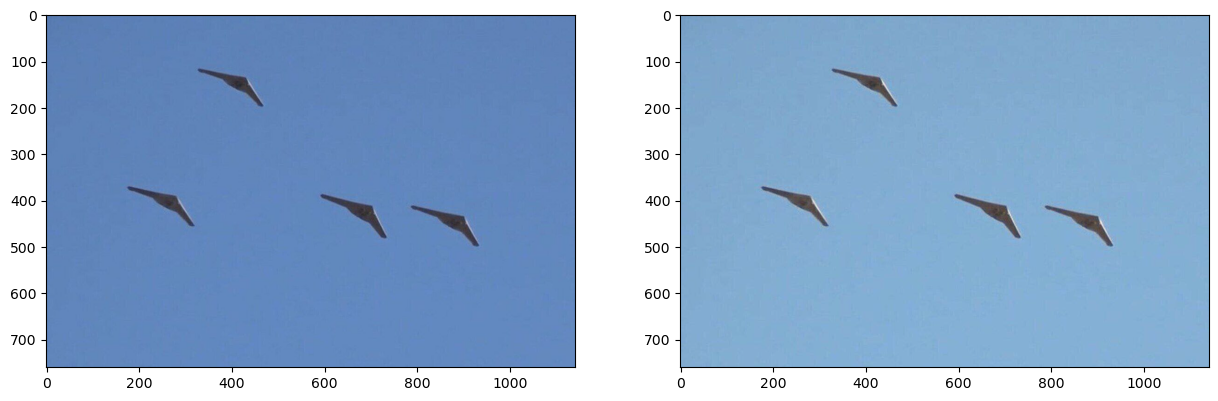

In [63]:
# Load your image
img = cv2.imread('data/driny.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
# max_r = np.max(img[;, :, 0])
# max_g = np.max(img[;, :, 1])
# max_b = np.max(img[;, :, 2])
coef = []
for i in range(3):
    coef.append(255 / np.max(img[:, :, i]))

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for ch in range(3):
    balanced[..., ch] = img[..., ch] * coef[ch]
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)